## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centres in Helsinki**.

Problem 1 concerns the locations of shopping centres: find their addresses and translate them into coordinates.

---

### a) Prepare an input file containing the addresses of shopping centres (1 point)

Find out the addresses of the following shopping centres (e.g., by using your favourite search engine), and collect them in a text file called `shopping_centres.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
The text file should be in semicolon-separated format (`;`) and include the following columns:

- `id` (integer) a unique identifier for each shopping centre (a
- `name` (string) of each shopping center
- `addr` (string) the address 


See an example of how to format the text file [in the lesson 3 materials](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding-in-geopandas.html). Remember to *add*, *commit*, and *push* the file to your git repository.

---


### b) Read the list of addresses (1 point)

Read the list of addresses you just prepared into a `pandas.DataFrame` called `shopping_centres`

In [2]:
# ADD YOUR OWN CODE HERE
import pandas as pd

import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"

shopping_centres = pd.read_csv("data/shopping_centres.txt", sep=";")

In [3]:
shopping_centres

,id,name,addr
0,0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
2,2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
3,3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland"
6,6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland"


In [4]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import pandas
assert isinstance(shopping_centres, pandas.DataFrame)
for column in ("id", "name", "addr"):
    assert column in shopping_centres.columns


---

### c) Geocode the addresses (2 points)

Geocode the addresses using the Nominatim geocoding service. Join the results with the input data, and store them in a `geopandas.GeoDataFrame` with the same name (`shopping_centres`). 

Remember to define a custom `user_agent` string!

In [7]:
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 326.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 581.0 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 612.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00


In [8]:
# ADD YOUR OWN CODE HERE
import geopandas as gpd

shopping_centres = gpd.tools.geocode(
    shopping_centres["addr"],
    provider="nominatim",
    user_agent="autogis2024",
    timeout=30
)
shopping_centres.head()

,geometry,address
0,POINT (25.07947 60.21046),"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio..."
1,POINT (24.9386 60.1692),"Change Lingerie, 14-20, Mannerheimintie, Kesku..."
2,POINT (24.73843 60.16031),"Musti ja Mirri, 11, Piispansilta, Matinkylä, S..."
3,POINT (24.81096 60.21808),"Arnolds, 3-9, Leppävaarankatu, Ruusutorppa, Et..."
4,POINT (24.96568 60.29159),"Jumbo, 3, Vantaanportinkatu, Vantaanportti, Pa..."


In [9]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
assert isinstance(shopping_centres, geopandas.GeoDataFrame)
for column in ("id", "name", "addr", "geometry"):
    assert column in shopping_centres.columns

AssertionError: 

In [10]:
type(shopping_centres)

geopandas.geodataframe.GeoDataFrame

Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [11]:
# ADD YOUR OWN CODE HERE
shopping_centres = shopping_centres.to_crs("EPSG:3879")

In [12]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import pyproj
assert shopping_centres.crs == pyproj.CRS("EPSG:3879")

In [13]:
shopping_centres.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


---

### d) Save the resulting vector data set (1 point)

Save `shopping_centres` as a *GeoPackage* named `shopping_centres.gpkg`:

In [15]:
# ADD YOUR OWN CODE HERE
shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg")

<Axes: >

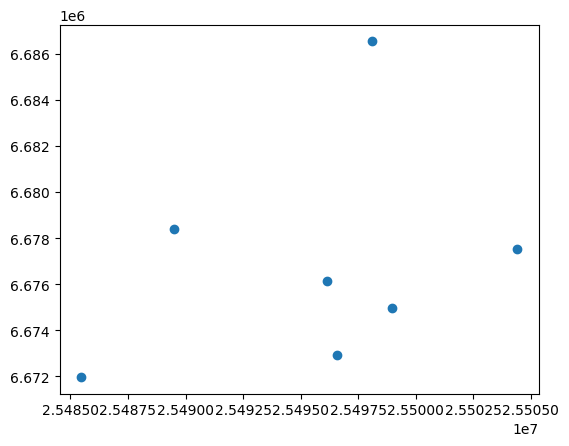

In [14]:
shopping_centres.plot()


---

Well done! Now you can continue to [problem 2](Exercise-3-Problem-2.ipynb)